#Import Lib

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Load data

In [185]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [186]:
%cd /content/drive/MyDrive/Colab Notebooks/VGU AI/Softmax Regression

/content/drive/MyDrive/Colab Notebooks/VGU AI/Softmax Regression


In [187]:
dataset_path='creditcard.csv'
df=pd.read_csv(
    dataset_path
)
# due to the skewed dataset, I modify the dataset by deleting negative samples to make the ratio between postive and negative increased
df=df.sort_values(by='Class',ascending=False)
df=df.reset_index() #reset index
df=df.loc[:1500].copy() #copy 1500 samples with nearly 500 positive samples
df=df.sample(frac=1) #shuffle data
df=df.reset_index()

In [188]:
df.iloc[:10]

,level_0,index,Time,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,170,150644,93823.0,-3.821939,5.667247,-9.244963,8.246147,-4.368286,-3.450735,-8.427378,...,1.990520,0.083353,-0.062264,0.390188,0.329884,0.098017,1.869570,1.000850,75.86,1
1,437,41943,40892.0,-2.140511,4.104871,-8.996859,4.028391,-5.131359,-4.153568,-9.360095,...,1.854267,-0.165534,-0.339939,0.296314,1.364225,-0.518996,2.352333,1.130625,0.76,1
2,1232,189457,128409.0,-0.054203,0.290533,-0.750507,-0.490082,1.866501,-0.911489,0.575068,...,-0.217198,-0.730009,0.240807,-0.010310,-0.962984,0.031851,0.081312,0.159147,1.29,0
3,24,238466,149676.0,1.833191,0.745333,-1.133009,3.893556,0.858164,0.910235,-0.498200,...,0.039289,0.181652,0.072981,-0.155299,-0.149891,0.012792,0.040854,0.022903,17.39,1
4,462,258403,158638.0,-5.976119,-7.196980,-5.388316,5.104799,4.676533,-5.566870,-4.291180,...,1.459369,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-1.034107,296.00,1
5,1305,189759,128549.0,-2.497243,-1.713152,-1.231629,-0.967642,1.856231,0.329867,1.323954,...,0.360986,0.772686,0.155349,-1.587088,-0.514036,0.136160,-0.195342,-0.198671,287.90,0
6,176,150654,93834.0,-3.765680,5.890735,-10.202268,10.259036,-5.611448,-3.235376,-10.632683,...,2.245606,0.546321,0.381853,0.382025,-0.821036,0.394355,1.412961,0.782407,0.01,1
7,118,151006,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.00,1
8,1100,189579,128466.0,-1.525964,-1.026883,-0.605164,0.055169,1.817175,-1.740195,-0.396177,...,0.694117,1.328954,-0.147493,-0.259398,-0.903925,-0.262576,0.189558,-0.113719,1.00,0
9,868,190111,128691.0,0.109790,0.920947,-0.160631,-0.885500,1.128868,-0.246517,1.018446,...,-0.302815,-0.674656,-0.000194,0.054317,-0.332561,0.146795,0.248495,0.099227,3.58,0


In [189]:
dataset_arr=df.to_numpy()
X,y=dataset_arr[:,:-1].astype(np.float64),dataset_arr[:,-1].astype(np.uint8)

In [190]:
#add bias into X
tmp=np.ones((X.shape[0],1))
X=np.concatenate((tmp,X),axis=1)

In [191]:
#one-hot encode y
n_classes=np.unique(y).size
n_samples=y.shape[0]
y_encoded=np.zeros((n_samples,n_classes))
y_encoded[np.arange(n_samples),y]= 1

In [192]:
#split dataset into train, validation, and test
val_size=0.2
test_size=0.125
random_state=2
shuffle=True
X_train,X_val,y_train,y_val=train_test_split(
    X,y_encoded,
    test_size=test_size,
    random_state=random_state,
    shuffle=shuffle
)
X_train,X_test,y_train,y_test=train_test_split(
    X_train,y_train,
    test_size=val_size,
    shuffle=shuffle
)

In [193]:
#normalize data
normalizer=StandardScaler()
X_train[:,1:]=normalizer.fit_transform(X_train[:,1:])
X_val[:,1:]=normalizer.transform(X_val[:,1:])
X_test[:,1:]=normalizer.transform(X_test[:,1:])

#Craft model

##Define modules

In [1]:
def softmax(z):
    exp_z=np.exp(z)
    return exp_z/(exp_z).sum(axis=1).reshape(-1,1)

In [2]:
def predict(X,W):
    return softmax(np.dot(X,W))

In [3]:
def compute_loss(y_hat,y):
    return (-1/y.size)*np.sum(y*np.log(y_hat))

In [4]:
def compute_accuracy(y_hat,y):
    return (np.argmax(y_hat,axis=1)==np.argmax(y,axis=1)).mean()

In [5]:
def compute_gradient(X,y_hat,y):
    return np.dot(X.T,(y_hat-y))/y.size

In [6]:
def update_W(W,gradient,lr,lamb):
    return W-(lr*gradient+lamb*W)

##Model

In [86]:
#init
lr=0.5
epochs=10000
batch_size=64
lamb=0.000001

np.random.seed(random_state)
n_features=X_train.shape[1]
n_classes=y_train.shape[1]
W=np.random.uniform(size=(n_features,n_classes))

In [87]:
train_losses=[]
train_accs=[]
val_losses=[]
val_accs=[]
for epoch in range(epochs):
    train_batch_losses=[]
    train_batch_accs=[]
    val_batch_losses=[]
    val_batch_accs=[]
    for i in range(0,X_train.shape[0],batch_size):
        X_batch=X_train[i:i+batch_size]
        y_batch=y_train[i:i+batch_size]

        #train
        y_hat=predict(X_batch,W)
        train_batch_losses.append(compute_loss(y_hat,y_batch))
        train_batch_accs.append(compute_accuracy(y_hat,y_batch))

        #validate
        y_hat_val=predict(X_val,W)
        val_batch_losses.append(compute_loss(y_hat_val,y_val))
        val_batch_accs.append(compute_accuracy(y_hat_val,y_val))

        #gradient descent
        gradient=compute_gradient(X_batch,y_hat,y_batch)
        W=update_W(W,gradient,lr,lamb)

    train_losses.append(np.array(train_batch_losses).mean())
    train_accs.append(np.array(train_batch_accs).mean())
    val_losses.append(np.array(val_batch_losses).mean())
    val_accs.append(np.array(val_batch_accs).mean())
    if (epoch+1)%1000==0:
        print(f'EPOCH {epoch+1}:\tTraning Loss: {train_losses[-1]:.3f}\tValidation Loss: {val_losses[-1]:.3f}')


EPOCH 1000:	Traning Loss: 0.002	Validation Loss: 0.007
EPOCH 2000:	Traning Loss: 0.001	Validation Loss: 0.006
EPOCH 3000:	Traning Loss: 0.001	Validation Loss: 0.005
EPOCH 4000:	Traning Loss: 0.001	Validation Loss: 0.005
EPOCH 5000:	Traning Loss: 0.001	Validation Loss: 0.005
EPOCH 6000:	Traning Loss: 0.001	Validation Loss: 0.005
EPOCH 7000:	Traning Loss: 0.000	Validation Loss: 0.004
EPOCH 8000:	Traning Loss: 0.000	Validation Loss: 0.004
EPOCH 9000:	Traning Loss: 0.000	Validation Loss: 0.004
EPOCH 10000:	Traning Loss: 0.000	Validation Loss: 0.004


##Evaluation

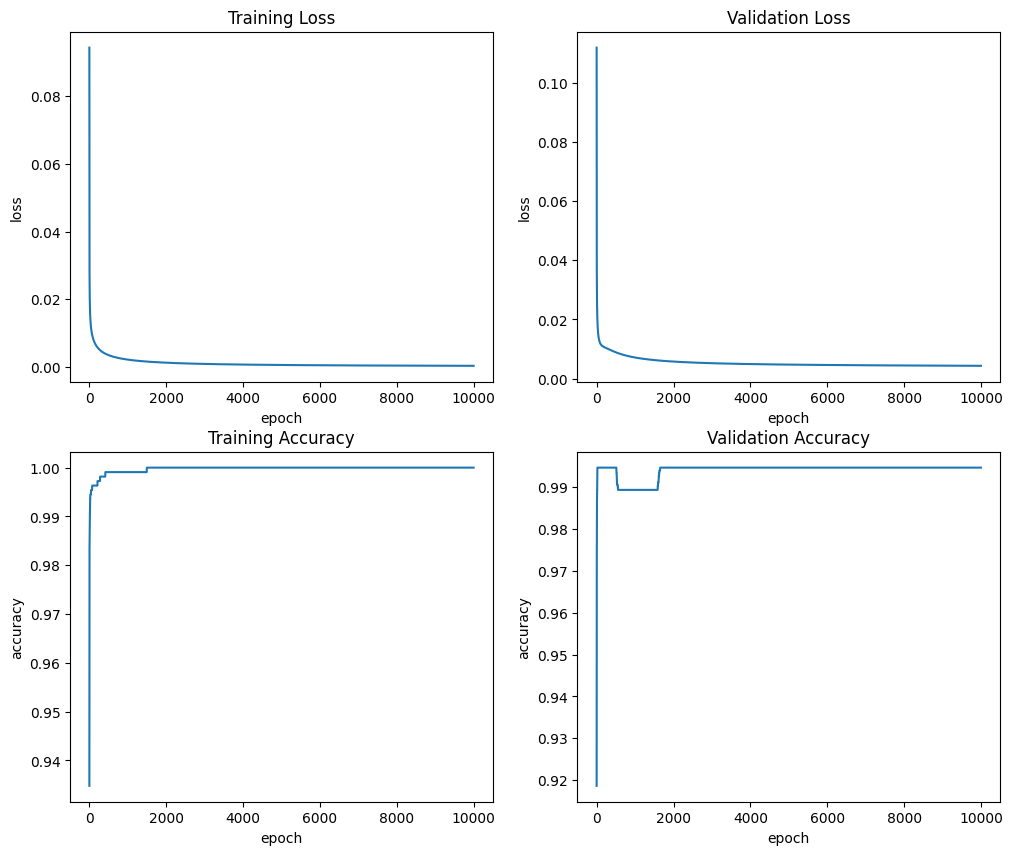

In [93]:
fig,ax=plt.subplots(2,2,figsize=(12,10))
ax[0,0].plot(train_losses)
ax[0,0].set(xlabel='epoch',ylabel='loss')
ax[0,0].set_title('Training Loss')

ax[0,1].plot(val_losses)
ax[0,1].set(xlabel='epoch',ylabel='loss')
ax[0,1].set_title('Validation Loss')

ax[1,0].plot(train_accs)
ax[1,0].set(xlabel='epoch',ylabel='accuracy')
ax[1,0].set_title('Training Accuracy')

ax[1,1].plot(val_accs)
ax[1,1].set(xlabel='epoch',ylabel='accuracy')
ax[1,1].set_title('Validation Accuracy')
plt.show()

In [94]:
y_hat_test=predict(X_test,W)
print(f'Loss: {compute_loss(y_hat_test,y_test)}\tAccuracy: {compute_accuracy(y_hat_test,y_test)}')

Loss: 0.019175785455680834	Accuracy: 0.9809885931558935


In [95]:
def compute_f1(y_hat,y):
    actual=np.argmax(y,axis=1)
    predict=np.argmax(y_hat,axis=1)
    true_pos=np.sum(actual+predict==2)
    false_neg=np.sum(actual>predict)
    false_pos=np.sum(actual<predict)
    true_neg=np.sum(actual+predict==0)
    print(true_pos,false_neg,false_pos,true_neg)
    P=true_pos/(true_pos+false_pos) #precision
    R=true_pos/(true_pos+false_neg) #recall
    print(P,R)
    return 2*P*R/(P+R)

In [96]:
compute_f1(y_hat_test,y_test)

90 2 3 168
0.967741935483871 0.9782608695652174


0.972972972972973

In [97]:
W

array([[ 5.41294677e+00, -5.02324019e+00],
       [ 1.05013924e+01, -9.67039538e+00],
       [-3.53477552e+00,  4.16811685e+00],
       [ 4.86487422e+00, -4.16976230e+00],
       [ 2.83321711e-01,  1.94599138e-01],
       [-2.75571453e-01,  1.24601870e+00],
       [ 1.19313623e+00, -6.46308119e-01],
       [-1.19208271e+00,  2.01024770e+00],
       [-3.50513773e-01,  1.48795282e+00],
       [ 1.01511329e+00, -2.33705128e-01],
       [-1.64805921e-01,  6.46144157e-01],
       [ 2.22698801e+00, -1.78435657e+00],
       [ 3.88725607e-01,  2.22007757e-01],
       [ 1.40027751e+00, -1.11937285e+00],
       [-1.47383389e-01,  6.28384073e-01],
       [ 1.53482503e+00, -9.69965572e-01],
       [ 2.14804502e-01,  7.33033064e-01],
       [ 7.68077073e-01, -1.54189751e-02],
       [ 5.94419202e-01,  5.64473816e-01],
       [ 3.61315834e-01,  3.66809821e-01],
       [-3.65619437e-03,  1.23925336e+00],
       [ 8.46102207e-01,  1.92561906e-01],
       [ 7.73787233e-01,  6.53977288e-02],
       [ 2.

#TF model

In [194]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [195]:
tf.random.set_seed(1234)
model=Sequential([
    Dense(4,activation='relu'),
    Dense(2)
])

In [196]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.0001),
    metrics=tf.keras.metrics.CategoricalAccuracy()
)

In [197]:
history=model.fit(
    X_train,y_train,
    validation_data=(X_val,y_val),
    batch_size=64,
    epochs=300
)

Epoch 1/300
17/17 [==============================] - 1s 16ms/step - loss: 1.6906 - categorical_accuracy: 0.1600 - val_loss: 2.0633 - val_categorical_accuracy: 0.1436
Epoch 2/300
17/17 [==============================] - 0s 5ms/step - loss: 1.6603 - categorical_accuracy: 0.1648 - val_loss: 2.0261 - val_categorical_accuracy: 0.1383
Epoch 3/300
17/17 [==============================] - 0s 5ms/step - loss: 1.6299 - categorical_accuracy: 0.1686 - val_loss: 1.9891 - val_categorical_accuracy: 0.1436
Epoch 4/300
17/17 [==============================] - 0s 4ms/step - loss: 1.5993 - categorical_accuracy: 0.1781 - val_loss: 1.9531 - val_categorical_accuracy: 0.1543
Epoch 5/300
17/17 [==============================] - 0s 5ms/step - loss: 1.5705 - categorical_accuracy: 0.1819 - val_loss: 1.9157 - val_categorical_accuracy: 0.1596
Epoch 6/300
17/17 [==============================] - 0s 4ms/step - loss: 1.5409 - categorical_accuracy: 0.1857 - val_loss: 1.8797 - val_categorical_accuracy: 0.1649
Epoch 7/3

In [198]:
history_df = pd.DataFrame(history.history)

In [199]:
import matplotlib.pyplot as plt

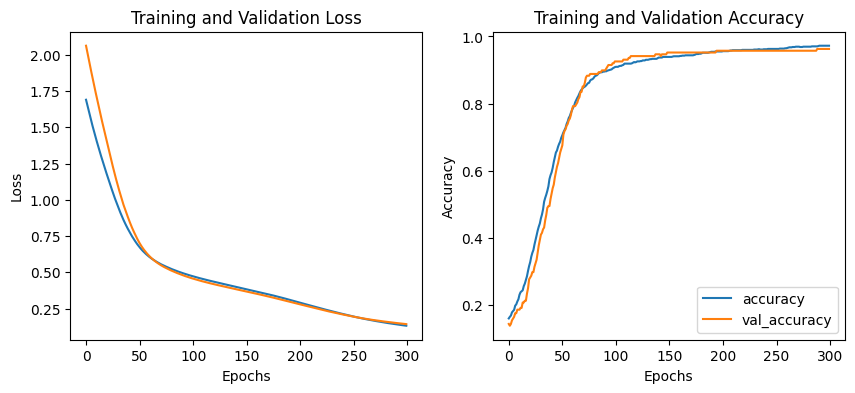

In [200]:
fig,axs=plt.subplots(1,2,figsize=(10,4))

axs[0].plot(history_df.loc[:, ['loss']],label='loss')
axs[0].plot(history_df.loc[:, ['val_loss']],label='val_loss')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')

axs[1].plot(history_df.loc[:, ['categorical_accuracy']],label='accuracy')
axs[1].plot(history_df.loc[:, ['val_categorical_accuracy']],label='val_accuracy')
axs[1].set_title('Training and Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')

plt.legend()
plt.show()

In [201]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 0.1309 - categorical_accuracy: 0.9696


[0.13093481957912445, 0.9695817232131958]

In [202]:
#test performance with F1 score
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.0001),
    metrics=tf.keras.metrics.F1Score()
)

In [203]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 1s 6ms/step - loss: 0.1309 - f1_score: 0.9656


[0.13093481957912445, array([0.9772727 , 0.95402294], dtype=float32)]